在现实环境中，采集的数据（建模样本）往往是比例失衡的。
比如网贷数据，逾期人数的比例是极低的（千分之几的比例）；奢侈品消费人群鉴定等。

In [1]:
!pip install imbalanced-learn

Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple


# 创建类别不平衡数据集

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:

# 生成样本数据
X, y = make_classification(
    n_samples=5000, # 样本点
    n_features=2, # 特征个数= n_informative()+n_redundant+n_repeated
    n_informative=2, # 多信息特征的个数
    n_redundant=0, #冗余信息，informative特征的随机线性组合
    n_repeated=0, #重复信息，随机提取n_informative和n_redundant特征
    n_classes=3, #分类类别
    n_clusters_per_class=1, # 某一个类别是由几个cluster构成的
    weights=[0.01, 0.05, 0.94], #类别类型，权重比。每个类占1%、5%、94%
    random_state=0
)

In [4]:
# 查看各个标签的样本
Counter(y), X.shape

(Counter({2: 4674, 1: 262, 0: 64}), (5000, 2))

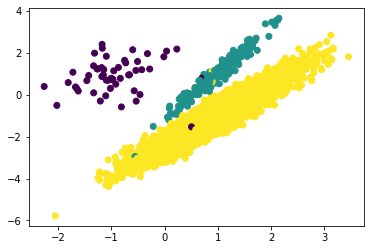

In [5]:
# 数据可视化
plt.scatter(X[:,0], X[:,1], c=y) # c：表示的是色彩或颜色序列

# 处理不平衡数据

主要有两种方式：
+ 过采样方法
对训练集里少数类及进行“过采样”，即增加一些少数样本使得使得正负样本比例均衡
+ 欠采样方法
对训练集中多数样本“欠采样”，即减少一些多数样本

## 随机过采样
随机过采样是在少数类样本$S_{min}$中随机选择一些样本，
然后通过复制所选择的样本生成样本集$E$，讲它们添加到$S_{min}$中来扩大原始数据集
从而得到新的少数类集合$S_{min-min}$。
新的数据集$S_{min-min}=S_{min}+E$

In [6]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
Counter(y_resampled)

Counter({2: 4674, 1: 4674, 0: 4674})

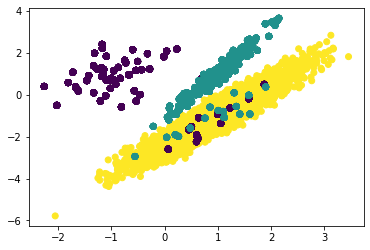

In [7]:
plt.scatter(X_resampled[:,0], X_resampled[:, 1],c=y_resampled)

## 随机过采样的缺点
+ 对于随机过采样，需要对少数类样本进行复制来扩大数据集，造成模型训练复杂度加大
+ 容易造成模型的过拟合，因为随机过采样是对初始样本进行复制采样，不利于学习器的泛化性能

为了解决随机过采样造成的过拟合问题，又保证数据集均衡的目的，出现了过采样代表性的算法SMOTE。

## SMOTE过采样
SMOTE全称是Synthetic Minority Oversampling合成少数类过采样技术。
SMOTE是对随机过采样的一个改进算法，由于随机过采样是对直接少数样本的重采用，
会使训练样本中有很多重复样本。

而SMOTE算法的思想就是对每个少数类样本$X_i$，从它的最邻近中随机选择一个样本$X^{*}_i$

$X^{*}_i$也是一个少数样本。

然后在$X_i$和$X^{*}_i$之间的连线上，随机选择一点作为新合成的少数类样本。

其算法描述如下：
1. 对于少数类中的每一个样本$X_i$，以欧氏距离为标准计算它到少数类样本集$S_{min}$中所有样本的距离，得到K近邻
2. 根据样本不平衡比例设置一个采样比率以确定采样倍率N，对于每一个少数类样本$X_i$，从其K近邻中选择若干个样本，假设选择的是$X^{*}_i$
3. 对于每一个随机选择出来的近邻$X^{*}_i$，分别与$X_i$按照如下公式构建新的样本

$$
    x_{new} = X_i + rand(0,1)*(X_i^* - X_i)
$$

In [8]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
Counter(y_resampled)

Counter({2: 4674, 1: 4674, 0: 4674})

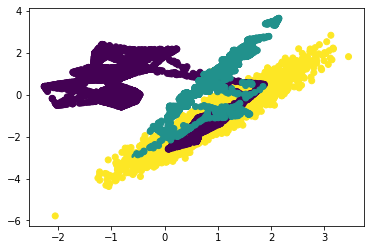

In [9]:
plt.scatter(X_resampled[:,0], X_resampled[:, 1],c=y_resampled)

# 欠采样

## 随机欠采样
从多类$S_{maj}$中随机选择一些样本组成样本集$E$，然后把样本集$E$从$S_{maj}$中移除，新的数据集
$S_{new-maj}=S_{maj}-E$。

In [12]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
Counter(y_resampled)

Counter({0: 64, 1: 64, 2: 64})

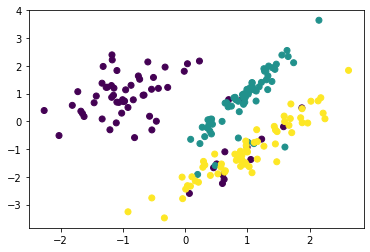

In [13]:
plt.scatter(X_resampled[:,0], X_resampled[:, 1],c=y_resampled)

## 随机欠采样的缺点
随机欠采样方法通过改变多数类样本比例以达到修改样本分布的目的，从而使样本分布较为均衡,但是这也存在一些问题。对于随机欠采样，由于采样的样本集合要少于原来的样本集期，因此会造成一些信息缺失，即将多数类样本删除有可能会导致分类器丢失有关多数类的重要信息。
